# Introduction

In this study, we will analyze a comprehensive dataset on video games, examining historical trends and sales data to uncover valuable insights. By exploring patterns in game releases, popularity, and market performance, we aim to answer key questions about the evolution of the gaming industry and the factors that drive sales success. This analysis will offer a deeper understanding of how games have shaped entertainment over time and highlight trends that continue to influence the market today.

In [42]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Reading data in
df = pd.read_csv("ice_game_data.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [45]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [46]:
# Converting column names to lowercase
df.columns = df.columns.str.lower()

In [47]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [48]:
#converting to string
df['platform'] = df['platform'].astype('str')

In [49]:
# Drop rows with missing values in 'year_of_release'
df = df.dropna(subset=['year_of_release'])

# Confirm no more missing values in 'year_of_release'
print(df['year_of_release'].isna().sum())

0


In [50]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


The user score column has over 40% missing values and is not relevant to this sales-focused project, so imputation is unnecessary. On the other hand, the rating column also contains missing values, but imputing game ratings randomly would not be appropriate.

In [52]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [53]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [54]:
# Finding potential duplicates based on 'name', 'platform', and 'year_of_release'
duplicates_subset = df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

# Display the duplicates
print(duplicates_subset)

                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
659              NaN      GEN             1993     NaN      1.78      0.53   
14244            NaN      GEN             1993     NaN      0.00      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


In [55]:
duplicates_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 604 to 16230
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2 non-null      object 
 1   platform         4 non-null      object 
 2   year_of_release  4 non-null      int64  
 3   genre            2 non-null      object 
 4   na_sales         4 non-null      float64
 5   eu_sales         4 non-null      float64
 6   jp_sales         4 non-null      float64
 7   other_sales      4 non-null      float64
 8   critic_score     2 non-null      float64
 9   user_score       2 non-null      object 
 10  rating           2 non-null      object 
dtypes: float64(5), int64(1), object(5)
memory usage: 384.0+ bytes


Looking through the data, there is a large amount of critic score, user score and ratings missing. They are for the much earlier years in gaming so my conclusion would be that a lot of those were not trackable until the later years which is backed by the fact that the first video game ratings were issued in 1994 by the Entertainment Software Rating Board (ESRB).

In [56]:
# Creating a total sales column (Millions)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [57]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Intermediate Conclusion

So far we have done some house cleaning to the data by making the columns lower case and converting some columns like platform and year of release. We also dropped the missing values with year of release because it is less than 2% of our total data so it won't greatly impact our data.

There was a very small amount of duplicate values that we did discover and there arent enough of them to significantly impact any findings we might have.

Next we dive more into the sales data and understanding which platforms performed well and which also their life cycle and how long they lasted.

In [58]:
# More video games released in the last two decades
df.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,0,9
1981,46,46,46,46,46,46,46,0,0,0,46
1982,36,36,36,36,36,36,36,0,0,0,36
1983,17,17,17,17,17,17,17,0,0,0,17
1984,14,14,14,14,14,14,14,0,0,0,14
1985,14,14,14,14,14,14,14,1,1,1,14
1986,21,21,21,21,21,21,21,0,0,0,21
1987,16,16,16,16,16,16,16,0,0,0,16
1988,15,15,15,15,15,15,15,1,1,1,15


### Let us look at how sales varied from platform to platform and choose the platforms with the greatest total sales and build distributions based on data for each year. We will also look find platforms that used to be popular but now have zero sales. We will also address how long does it generally take for new platforms to appear and old ones to fade?

In [59]:
# Group by 'platform' and 'year', then sum 'total_sales' for each combination
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values().reset_index()

# Display the resulting DataFrame
print("Total Sales by Year for Each Platform:\n", platform_year_sales)

Total Sales by Year for Each Platform:
     platform  year_of_release  total_sales
0         DC             2007         0.02
1        3DO             1994         0.02
2         DS             1985         0.02
3       PCFX             1996         0.03
4         PC             1988         0.03
..       ...              ...          ...
233      Wii             2008       171.32
234      PS2             2003       184.31
235      PS2             2002       205.38
236      Wii             2009       206.97
237      PS2             2004       211.81

[238 rows x 3 columns]


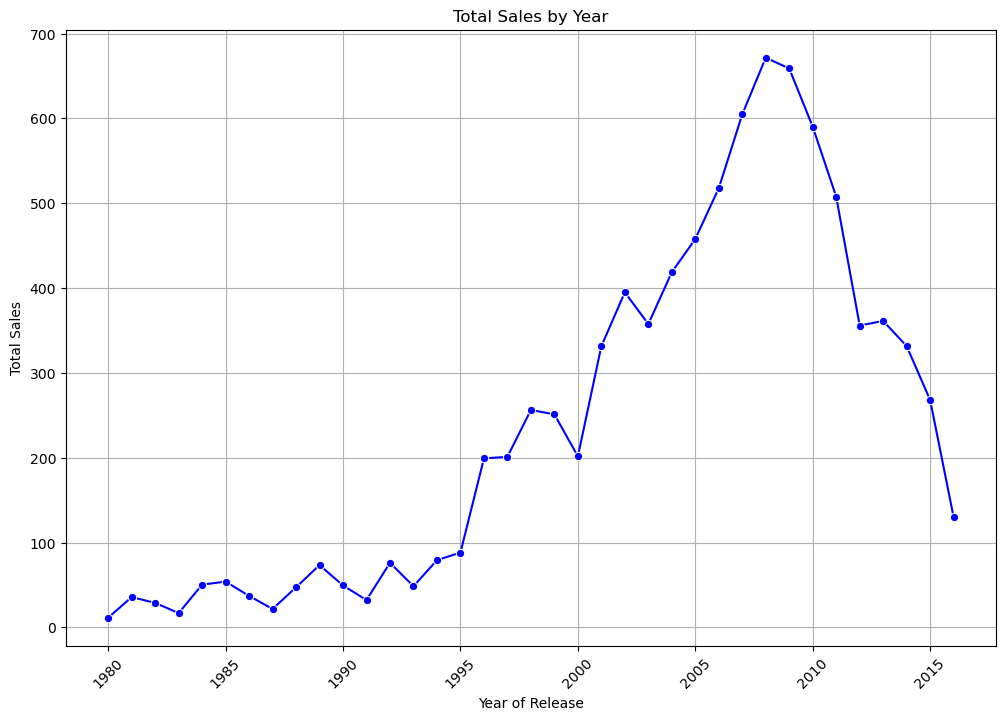

In [60]:
# Group data by year and sum total sales
yearly_sales = df.groupby('year_of_release')['total_sales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_sales, x='year_of_release', y='total_sales', marker="o", color='b')

# Customize the plot
plt.title("Total Sales by Year")
plt.xlabel("Year of Release")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

###### The graph above shows the peak of sales happened in with releases in 2008.

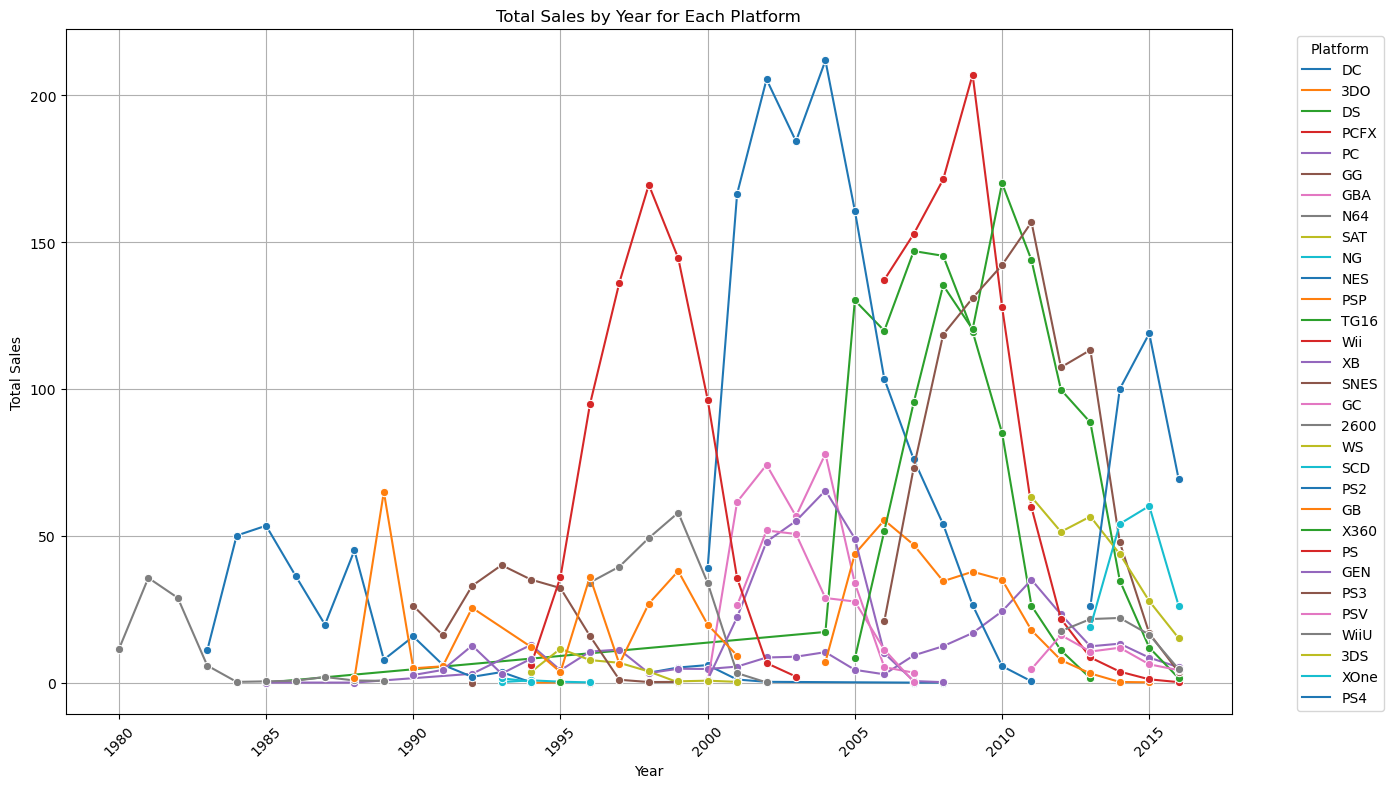

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data with a distinctive color palette
plt.figure(figsize=(14, 8))
sns.lineplot(data=platform_year_sales, x='year_of_release', y='total_sales', hue='platform', 
             marker="o", palette="tab10")  # Use a more distinctive color palette

# Customize the plot
plt.title("Total Sales by Year for Each Platform")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In the above chart there is a lot of information to be broken down.Platforms like the NES (Nintendo Entertainment System) saw early peaks in the 1980s. The PS2 and Xbox 360 experienced significant sales spikes in the mid-2000s.
Newer platforms like the PS4 and Xbox One show sales starting around 2013 but generally appear with lower peak sales compared to some older platforms.

You can also see a life cycle of most platforms as well. The PS2 and Wii had significant rises in sales followed by a steep decline as their successors gained popularity.Older platforms, such as the NES and SNES, show similar patterns, with high sales early on but becoming obsolete over time.

Starting around 2005–2010, the sales distribution becomes more competitive, with several platforms like PS3, Wii, Xbox 360 competing simultaneously. After 2012, newer platforms like the PS4 and Xbox One start taking over, indicating the start of a new platform taking over.

/var/folders/2y/120w3dvs42x50x4582hhr9380000gn/T/ipykernel_83203/847145833.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = platform_year_sales.pivot("platform", "year_of_release", "total_sales")


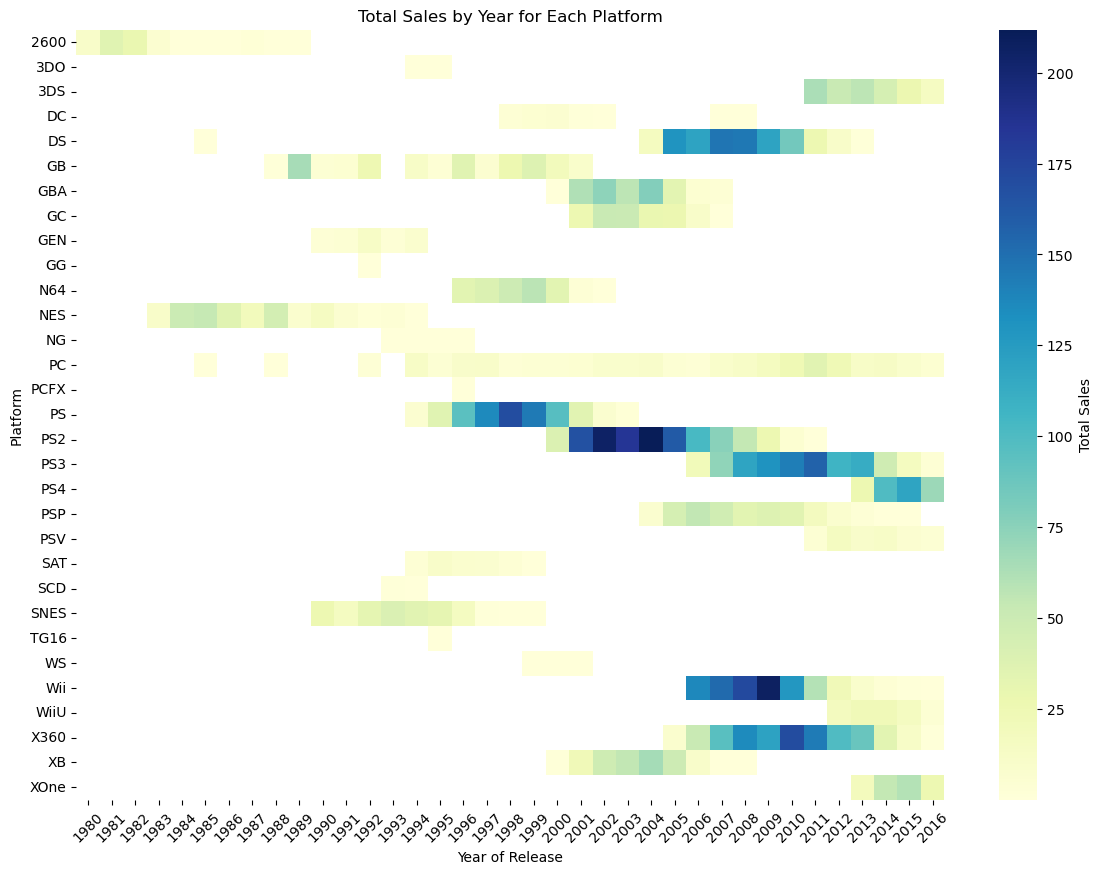

In [62]:
# Pivot data for heatmap
heatmap_data = platform_year_sales.pivot("platform", "year_of_release", "total_sales")

df['year_of_release'] = df['year_of_release'].astype(int)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Total Sales'})
plt.title("Total Sales by Year for Each Platform")
plt.xlabel("Year of Release")
plt.ylabel("Platform")
plt.xticks(rotation=45)
plt.show()

According to our data, it takes around 9-10 years  for a platform to come onto the scene and then drop off. For example, look at PS2.  Sales register on our heatmap in 1994, peak in 1998 and fizzle out in 2009 and no longer register in 2010.  Another example would be SNES (Super Nintendo Entertainment System) where it launches in 1989, peaks in 1993 and no longer registers after 1999.

The heat map here just follows the same story as the above line chart with the darker spots showing peak sales over time and the lighter spots indicating lower sales.

### While this information provides insight into the historical performance of platforms, our goal is to build a model that looks ahead from 2017 and beyond. Therefore, we need to develop a dataset specifically for a period that would help us focus on 2017 onward by focusing on a smaller sample of data.

### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [63]:
start_year = 2012
end_year = 2016

# Filtering for year_of_release between 2012 and 2017
rel_df = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= end_year)].dropna().reset_index(drop=True)

rel_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


The above code helps us narrow down the years into a new dataframe called rel_df so that we can focus on our relative years to build out our 2017 model.

In [64]:
rel_df.groupby('platform')['total_sales'].sum().sort_values()

platform
PSP       0.15
DS        1.02
Wii      13.23
PSV      27.06
PC       54.31
WiiU     66.27
3DS      79.71
XOne    129.62
X360    180.60
PS3     207.88
PS4     243.05
Name: total_sales, dtype: float64

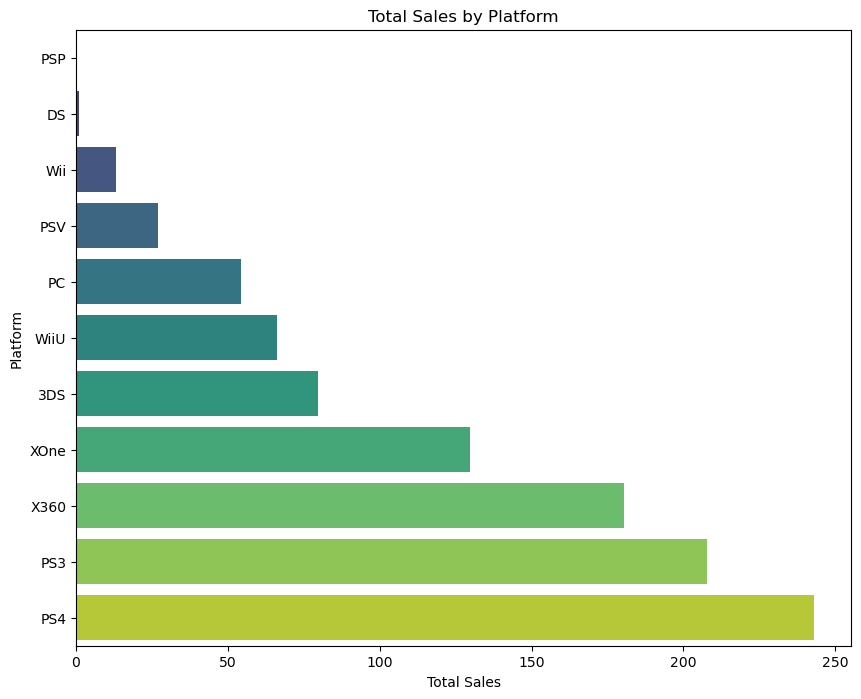

In [65]:
sales_by_platform = rel_df.groupby('platform')['total_sales'].sum().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sales_by_platform.values, y=sales_by_platform.index, palette="viridis")

plt.xlabel("Total Sales")
plt.ylabel("Platform")
plt.title("Total Sales by Platform")
plt.show()

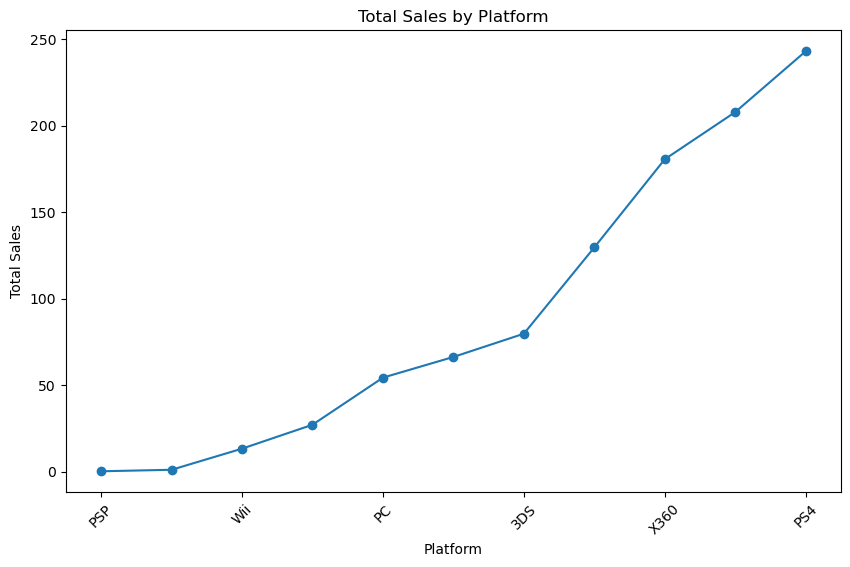

In [66]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
sales_by_platform.plot(kind='line', marker='o')

# Adding titles and labels
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()

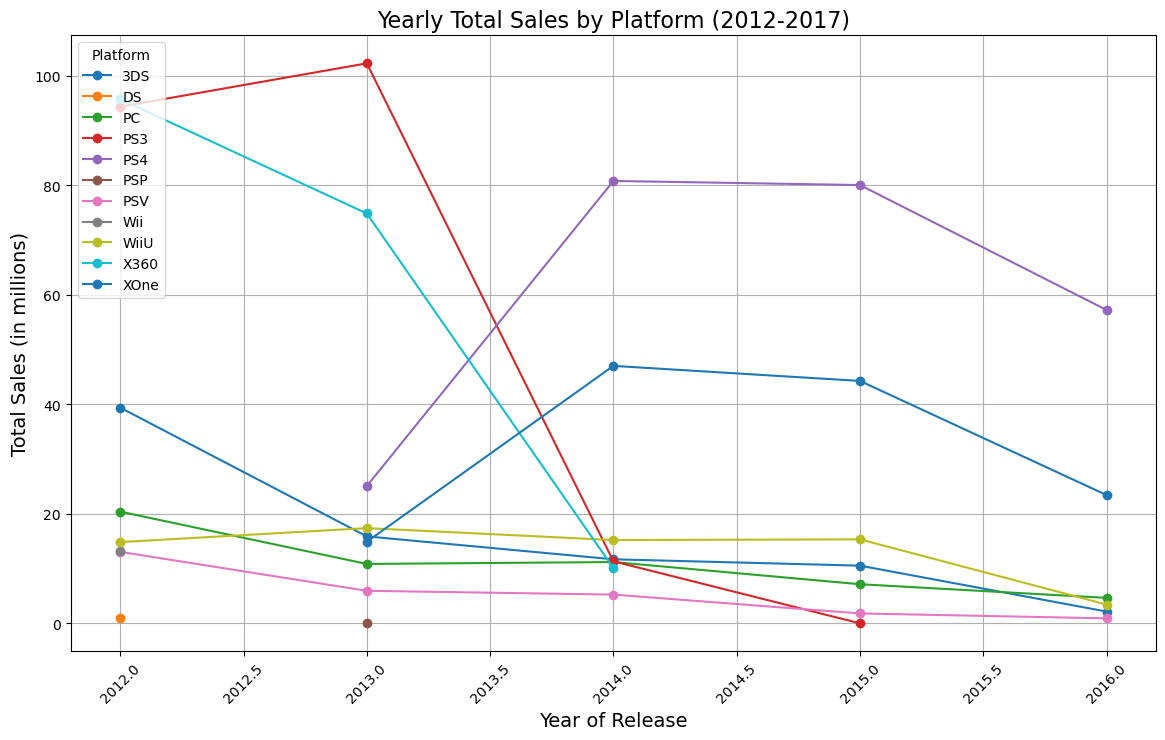

In [67]:
# Group by year and platform, summing total sales
sales_trends = rel_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Pivot for a line plot (platforms as columns, years as rows)
sales_trends_pivot = sales_trends.pivot(index='year_of_release', columns='platform', values='total_sales')

# Plotting the line chart
plt.figure(figsize=(14, 8))
sales_trends_pivot.plot(kind='line', marker='o', ax=plt.gca())

# Adding titles and labels
plt.title('Yearly Total Sales by Platform (2012-2017)', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Platform', loc='upper left')
plt.grid(True)

plt.show()

The most promosing platforms would be the PS4 and Xbox One. The PS3 and Xbox 360 are coming to the end of their lifecycle which is why the PS4 and Xbox One have high sales as such a young platform. I would also take 3DS into account, as it still has a quite large sales volume.

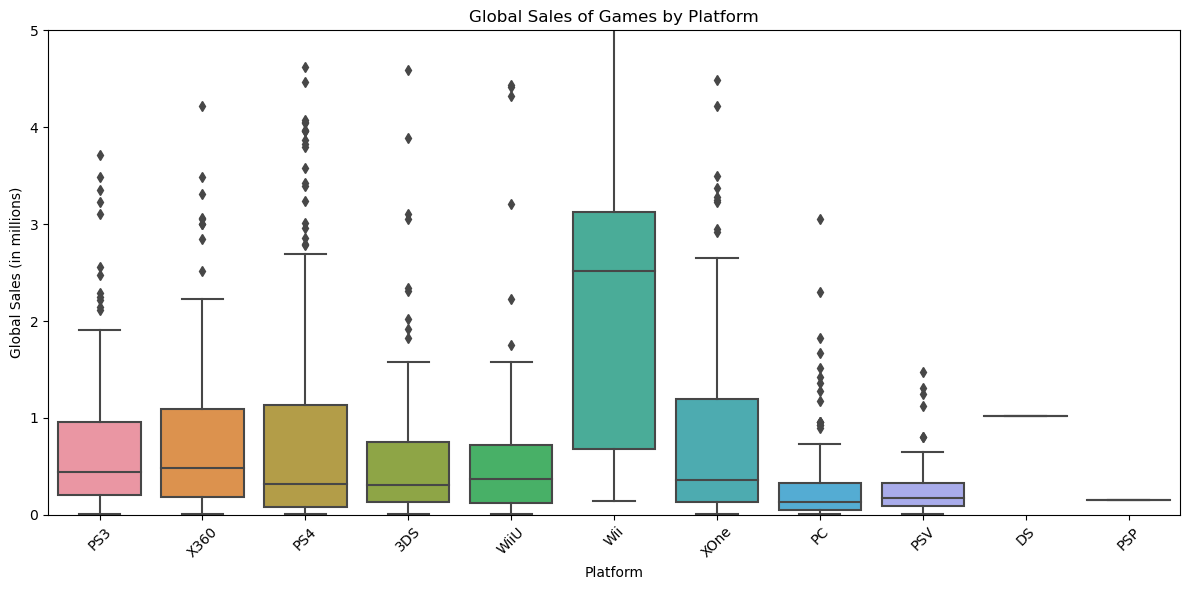

In [68]:
plt.figure(figsize=(12, 6))

# Creating a box plot of global sales broken down by platform
sns.boxplot(x='platform', y='total_sales', data=rel_df)

# Customize the plot
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)  # Rotate platform labels for better readability

# Setting the y-axis limits to focus on the range of interest
plt.ylim(0, 5)  # Adjusting the range based on the data to provide a better comparison

plt.tight_layout()

# Show the plot
plt.show()

The Wii stands out as a top-performing platform, with the highest median sales and the widest range, suggesting it had many games that sold well. Other platforms, such as the PS4, Xbox 360, and PS3, also achieved solid sales but had lower median values and smaller ranges compared to the Wii, though they still produced several high-selling games, as shown by their outliers. In contrast, platforms like PC, PS Vita, DS, and PSP generally saw lower sales per game, with shorter box heights and fewer outliers, indicating they had fewer standout titles. Overall, the chart highlights the Wii's dominance in sales distribution, while lower sales per game are more common on platforms such as PC and handheld consoles.

### Let's explore potential trends between user scores and critic scores, and examine how they relate to sales performance.

/var/folders/2y/120w3dvs42x50x4582hhr9380000gn/T/ipykernel_83203/1706992637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
/var/folders/2y/120w3dvs42x50x4582hhr9380000gn/T/ipykernel_83203/1706992637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4_data['critic_score'] = pd.to_numeric(ps4_data['critic_score'], errors='coerce')
/var/folders/2y/120w3dvs42x50x4582hhr9380000gn/T/ipykernel_83203/1706992637.py:6: SettingWit

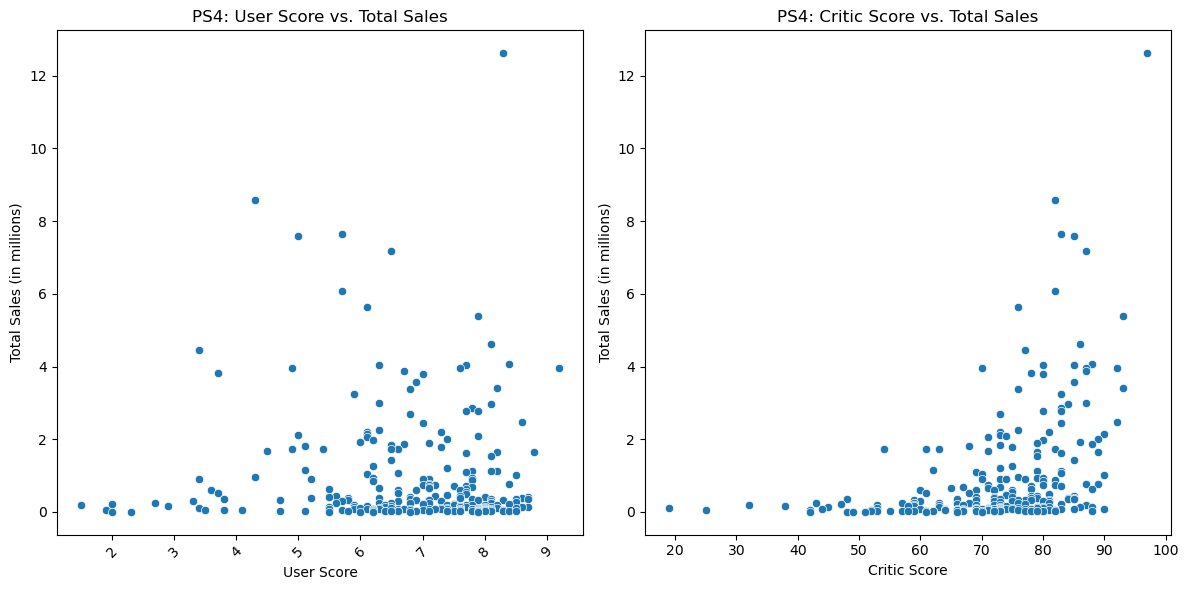

Correlation between User Score and Total Sales: -0.03
Correlation between Critic Score and Total Sales: 0.40


In [70]:
# Filtering the data to include only PS4 platform games
ps4_data = rel_df[rel_df['platform'] == 'PS4']

ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')
ps4_data['critic_score'] = pd.to_numeric(ps4_data['critic_score'], errors='coerce')
ps4_data['total_sales'] = pd.to_numeric(ps4_data['total_sales'], errors='coerce')

# Creating scatter plot for user_score vs. total_sales
plt.figure(figsize=(12, 6))

# Scatter plot of user_score vs total_sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('PS4: User Score vs. Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Scatter plot of critic_score vs total_sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('PS4: Critic Score vs. Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

plt.tight_layout()
plt.show()

# Calculate correlation between review scores and total sales
user_sales_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_sales_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlation between User Score and Total Sales: {user_sales_corr:.2f}")
print(f"Correlation between Critic Score and Total Sales: {critic_sales_corr:.2f}")

There appears to be no clear relationship between user scores and total sales. The points are scattered randomly without any real trend. The correlation value of -0.03 confirms this, indicating a negligible negative relationship. This suggests that user scores might not strongly influence sales for PS4 games.

A weak positive trend is visible. Higher critic scores tend to correspond to slightly higher sales, though there is still considerable variation. The correlation value of 0.40 indicates a moderate positive relationship between critic scores and sales. Games with higher critic scores are more likely to sell well compared to games with low critic scores.

### Next, let's analyze the genre data to identify the most popular genres and examine their corresponding sales figures.

In [71]:
# Counting number of games by genre
genre_counts = rel_df['genre'].value_counts()
print("Number of games by genre:\n", genre_counts)

Number of games by genre:
 Action          425
Shooter         171
Role-Playing    159
Sports          137
Racing           79
Fighting         63
Platform         59
Misc             56
Adventure        48
Simulation       35
Strategy         25
Puzzle            9
Name: genre, dtype: int64


In [72]:
#Sum total sales by genre
genre_sales = rel_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Total sales by genre:\n", genre_sales)

Total sales by genre:
 genre
Action          328.26
Shooter         241.37
Sports          138.76
Role-Playing     91.29
Platform         49.58
Racing           41.56
Misc             37.75
Fighting         26.21
Simulation       24.39
Adventure        11.30
Strategy          9.29
Puzzle            3.14
Name: total_sales, dtype: float64


In [73]:
# Calculate total number of games per genre
genre_game_count = rel_df.groupby('genre')['name'].count()

# Calculate average sales per game
average_sales_per_game = (genre_sales / genre_game_count).sort_values(ascending=False)

# Calculate median sales per game
median_sales_per_game = rel_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Print results
print("Average sales per game by genre:\n", average_sales_per_game)
print("\nMedian sales per game by genre:\n", median_sales_per_game)

Average sales per game by genre:
 genre
Shooter         1.411520
Sports          1.012847
Platform        0.840339
Action          0.772376
Simulation      0.696857
Misc            0.674107
Role-Playing    0.574151
Racing          0.526076
Fighting        0.416032
Strategy        0.371600
Puzzle          0.348889
Adventure       0.235417
dtype: float64

Median sales per game by genre:
 genre
Shooter         0.570
Sports          0.540
Misc            0.365
Action          0.280
Platform        0.250
Strategy        0.240
Fighting        0.220
Role-Playing    0.210
Simulation      0.200
Racing          0.170
Puzzle          0.100
Adventure       0.085
Name: total_sales, dtype: float64


Action has the most titles as well as the must total sales by genre. However, their sheer volume of titles helped them attain as such. Sales per game by genre and Median Sales per game by genre are both lead by shooter and sports respectively. So just because you create an action title, doesn’t mean you will rack in money, the market is actually showing that it enjoys shooting and sports games.

In [74]:
# Top five platforms for each region
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    
    # Group by platform and sum the sales for the current region
    top_platforms = rel_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(f"Top 5 Platforms in {region}:\n{top_platforms}\n")

Top 5 Platforms in na_sales:
platform
X360    106.82
PS4      84.20
PS3      76.97
XOne     75.64
WiiU     30.78
Name: na_sales, dtype: float64

Top 5 Platforms in eu_sales:
platform
PS4     111.78
PS3      78.31
X360     57.00
XOne     42.09
PC       31.51
Name: eu_sales, dtype: float64

Top 5 Platforms in jp_sales:
platform
3DS     26.60
PS3     20.29
WiiU    10.17
PS4      9.29
PSV      7.05
Name: jp_sales, dtype: float64



In [75]:
# Define the regions to analyze
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Dictionary to store the top five platforms and market shares for each region
top_platforms_per_region = {}

# Calculate the top five platforms by sales and their market share for each region
for region in regions:
    # Group by platform and calculate the total sales for the current region
    top_platforms = (
        rel_df.groupby('platform')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    
    # Calculate total sales in the region to determine market share
    total_sales_region = rel_df[region].sum()
    market_share = (top_platforms / total_sales_region) * 100
    
    # Storing the result in the dictionary for later comparison
    top_platforms_per_region[region] = market_share

top_platforms_per_region

{'na_sales': platform
 X360    24.454009
 PS4     19.275674
 PS3     17.620530
 XOne    17.316057
 WiiU     7.046381
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     29.973453
 PS3     20.998579
 X360    15.284370
 XOne    11.286300
 PC       8.449307
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     34.689619
 PS3     26.460616
 WiiU    13.262911
 PS4     12.115284
 PSV      9.194053
 Name: jp_sales, dtype: float64}

Each region demonstrates unique preferences in gaming platforms. North America leans towards Xbox platforms, Europe strongly favors Sony's PlayStation, and Japan exhibits a significant preference for handheld systems like the 3DS. These regional variations underline the importance of tailoring marketing strategies and game development to align with specific regional interests and gaming habits.

In [76]:
# Dictionary to store the top five genres and their market shares for each region
top_genres_per_region = {}

# Calculating the top five genres by sales and their market share for each region
for region in regions:
    # Group by genre and calculate the total sales for the current region
    top_genres = (
        rel_df.groupby('genre')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )
    
    # Calculating total sales in the region to determine market share
    total_sales_region = rel_df[region].sum()
    market_share = (top_genres / total_sales_region) * 100
    
    # Store the result in the dictionary for later comparison
    top_genres_per_region[region] = market_share

top_genres_per_region

{'na_sales': genre
 Action          31.866673
 Shooter         26.484593
 Sports          15.070281
 Role-Playing     8.348977
 Platform         4.688430
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          34.089507
 Shooter         23.889202
 Sports          14.147427
 Role-Playing     7.569785
 Racing           5.588180
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Action          27.217006
 Role-Playing    22.769953
 Platform        10.380803
 Shooter          9.937402
 Simulation       9.585290
 Name: jp_sales, dtype: float64}

The action genre is the top performer globally, but regional differences highlight key cultural preferences. Europe markets favor Shooters and Sports, while Japan shows a stronger passion towards Role-Playing and Platform games.

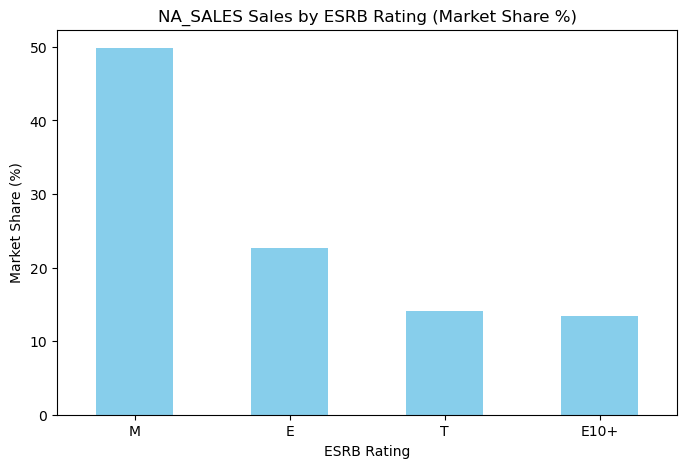

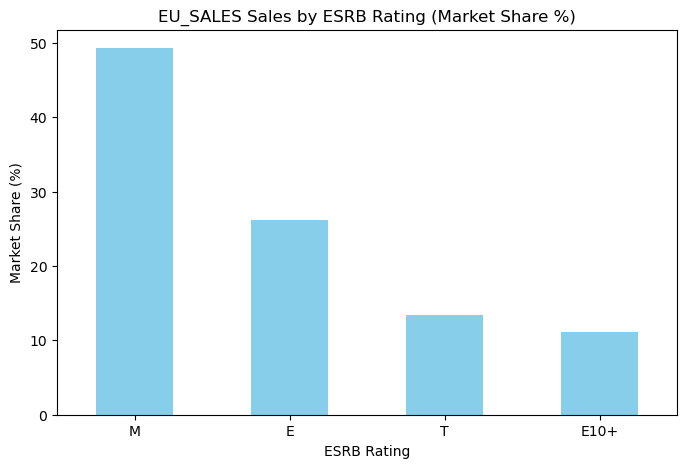

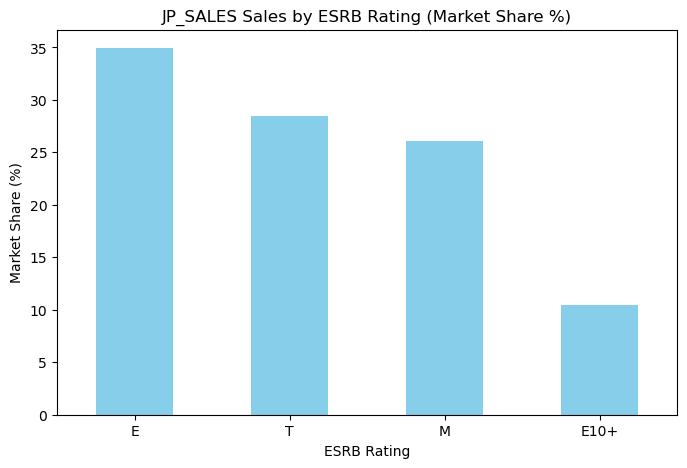


Total Sales by ESRB Rating in NA_SALES:
rating
M       217.69
E        99.23
T        61.32
E10+     58.58
Name: na_sales, dtype: float64


Total Sales by ESRB Rating in EU_SALES:
rating
M       183.82
E        97.58
T        49.86
E10+     41.67
Name: eu_sales, dtype: float64


Total Sales by ESRB Rating in JP_SALES:
rating
E       26.79
T       21.86
M       20.02
E10+     8.01
Name: jp_sales, dtype: float64



In [77]:
# Define the regions
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Dictionary to store total sales by ESRB rating for each region
esrb_sales_per_region = {}

# Calculating total sales by ESRB rating for each region
for region in regions:
    # Group by 'Rating' and sum sales in the region
    esrb_sales = (
        rel_df.groupby('rating')[region]
        .sum()
        .sort_values(ascending=False)
    )
    
    # Store the result for later analysis
    esrb_sales_per_region[region] = esrb_sales

    # Calculating market share percentage
    total_sales_region = rel_df[region].sum()
    market_share = (esrb_sales / total_sales_region) * 100
    
    # Plotting sales by ESRB rating for the current region
    plt.figure(figsize=(8, 5))
    market_share.plot(kind='bar', color='skyblue')
    plt.title(f'{region.upper()} Sales by ESRB Rating (Market Share %)')
    plt.xlabel('ESRB Rating')
    plt.ylabel('Market Share (%)')
    plt.xticks(rotation=0)
    plt.show()

# To display results as tables if needed
for region, esrb_sales in esrb_sales_per_region.items():
    print(f"\nTotal Sales by ESRB Rating in {region.upper()}:\n{esrb_sales}\n")

Both North America and Europe regions heavily favor M-rated games, showing a strong appetite for mature-themed content. Europe has a slightly higher emphasis on E-rated games compared to NA.

For the platform comparison between Xbox One and PS4, the null hypothesis (H₀) states that there is no difference in the average user scores for games on the two platforms. In contrast, the alternative hypothesis (H₁) asserts that there is a difference in the average user scores for games on the Xbox One and PS4.

For the genre comparison between Action and Sports games, the null hypothesis (H₀) posits that there is no difference in the average user scores for games in these two genres. Conversely, the alternative hypothesis (H₁) suggests that there is a difference in the average user scores for games in the Action and Sports genres.

The independent t-test is appropriate because we are comparing the means of two independent groups. Each game belongs exclusively to one platform or genre, so the samples are independent.

A significance level of 0.05 is standard in hypothesis testing, balancing the trade-off between Type I errors (false positives) and Type II errors (false negatives).

In [78]:
from scipy.stats import ttest_ind

# Converting the user_score column to numeric, forcing errors to NaN
rel_df['user_score'] = pd.to_numeric(rel_df['user_score'], errors='coerce')

# Drop rows with NaN values in user_score because they cannot be used in the t-test
rel_df = rel_df.dropna(subset=['user_score'])

# Define alpha level
alpha = 0.05

# Independent T-Test for Xbox One vs. PS4 Platforms
xbox_one_scores = rel_df[rel_df['platform'] == 'XOne']['user_score']
ps4_scores = rel_df[rel_df['platform'] == 'PS4']['user_score']

t_stat, p_value = ttest_ind(xbox_one_scores, ps4_scores, equal_var=False)

print("Platform Comparison: Xbox One vs PS4")
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Average user scores for Xbox One and PS4 are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user scores for Xbox One and PS4.")

# Independent T-Test for Action vs. Sports Genres
action_scores = rel_df[rel_df['genre'] == 'Action']['user_score']
sports_scores = rel_df[rel_df['genre'] == 'Sports']['user_score']

t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print("\nGenre Comparison: Action vs Sports")
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Average user scores for Action and Sports genres are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average user scores for Action and Sports genres.")


Platform Comparison: Xbox One vs PS4
T-statistic: -1.7357248036488118
P-value: 0.08347422184895681
Fail to reject the null hypothesis: No significant difference in average user scores for Xbox One and PS4.

Genre Comparison: Action vs Sports
T-statistic: 7.70054879032404
P-value: 4.778145125344677e-13
Reject the null hypothesis: Average user scores for Action and Sports genres are significantly different.


Xbox One vs PS4 Comparison:
Since the p-value is greater than the significance level (α = 0.05), we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the average user scores between Xbox One and PS4 platforms in the dataset. While the results suggest some variation in user scores, the difference is not strong enough to be considered significant based on the chosen threshold.

Genre Comparison: Action vs Sports
The t-test yielded a t-statistic of approximately 7.70 and a p-value of 
4.78
×
1
0
−
13
4.78×10 
−13
 , which is far below the significance level (
𝛼
=
0.05
α=0.05). This provides strong evidence to reject the null hypothesis, indicating that the average user scores for Action and Sports genres are significantly different.

# Final Conclusion

We were able to determine that the most significant data was between 2012-2016 since we are looking to build our insights for 2017 and beyond.

PS4 is the most dominant platform in terms of sales with 243.5 Million to date. Along with the PS4, the Xbox One prove to be our most promising sysyems since they are early on in their lifecycle. Both started in 2013 and the average life cycle has been approximately 9-10 years.

We also evaluated user scores and critic scores related to sales. While there was no clear correlation between user score and total sales, critic score to total sales showed a weak positive correlation. Meaning games with higher critic scores are more likely to sell well compared to games with low critic scores.

Action games proved to be the most well represented with 425 total titles and produced the most revenue with over a billion in sales. However, average sales per game by genre proved the shooters and sports had the best sales to releases ratio.

Xbox 360 ruled  North America in sales and market share with 106.82 million in sales and 24% market share. While PS4 was more heavily favoried in Europe with 111.78 million in sales with a 29.9% market share. In Japan 3DS was the leader in sales with 26.6 million and a whopping 34.6% market share.

We also looked at ESRB Ratings per region to see which region preferred what types of games. In North America and Europe, both markets leaned towards M rated games while Japan leaned towards E rated games.

The t-test yielded a t-statistic of approximately 7.70 and a p-value of 4.78 x 10^-13 which is far below the significance level (alpha = 0.05) This provides strong evidence to reject the null hypothesis, indicating that the average user scores for Action and Sports genres are significantly different. While the results suggest some variation in user scores, the difference is not strong enough to be considered significant based on the chosen threshold when it comes to our comparison of Xbox One and PS4 user scores.